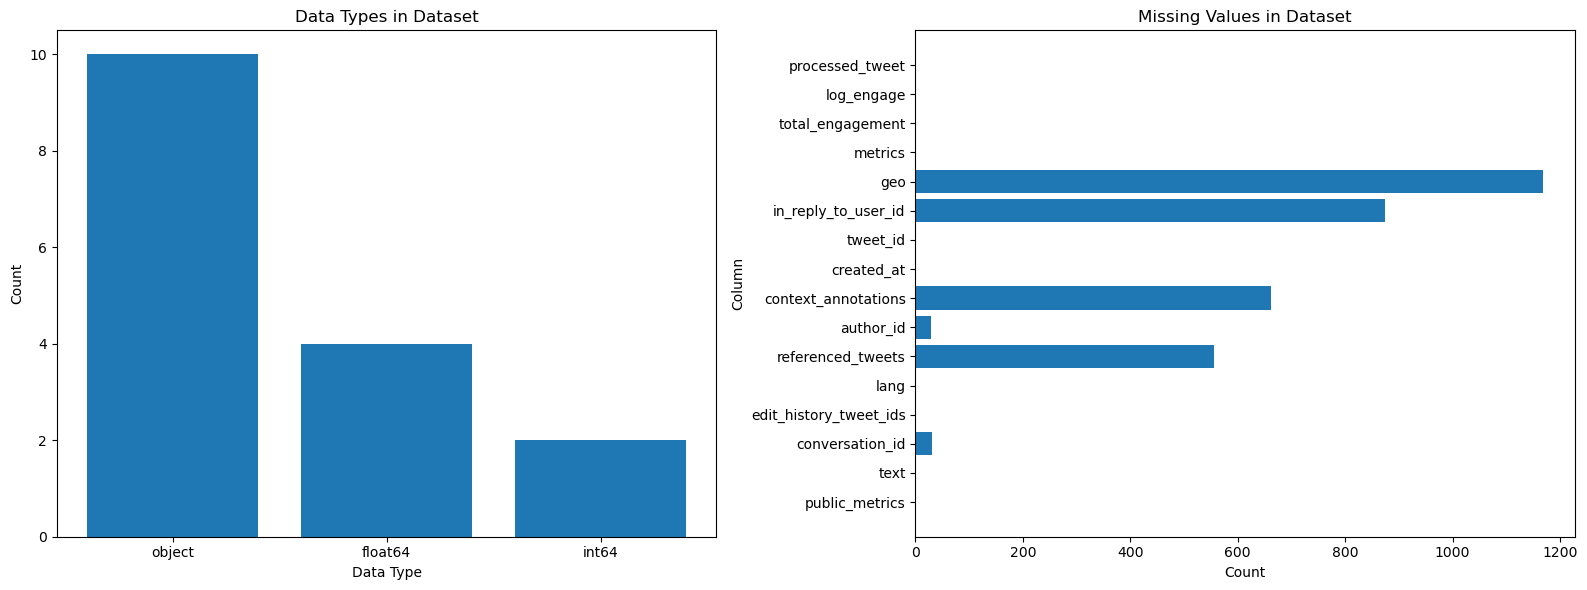

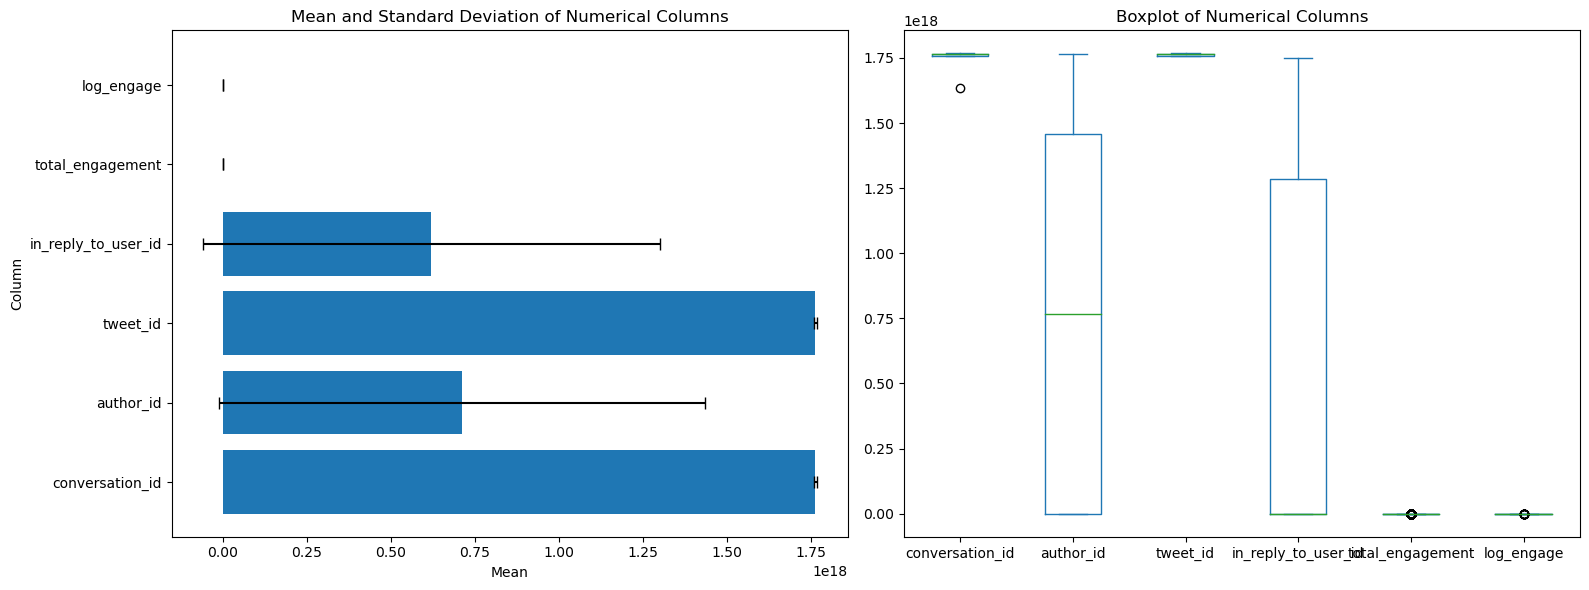

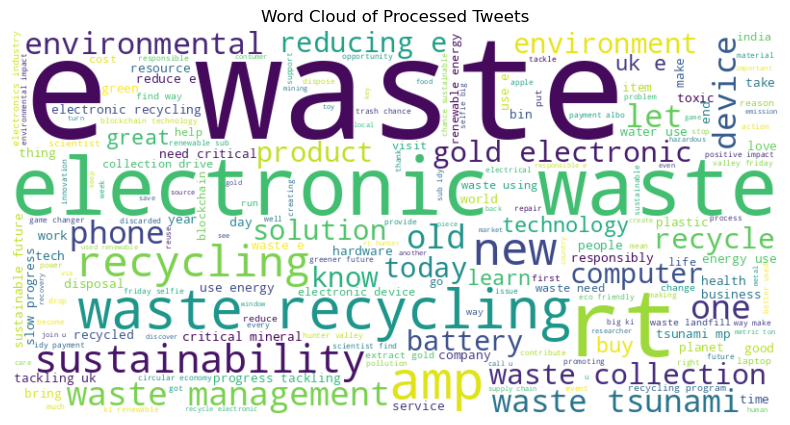

c:\Users\Truck\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Truck\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Truck\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Truck\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Truck\anaconda3\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


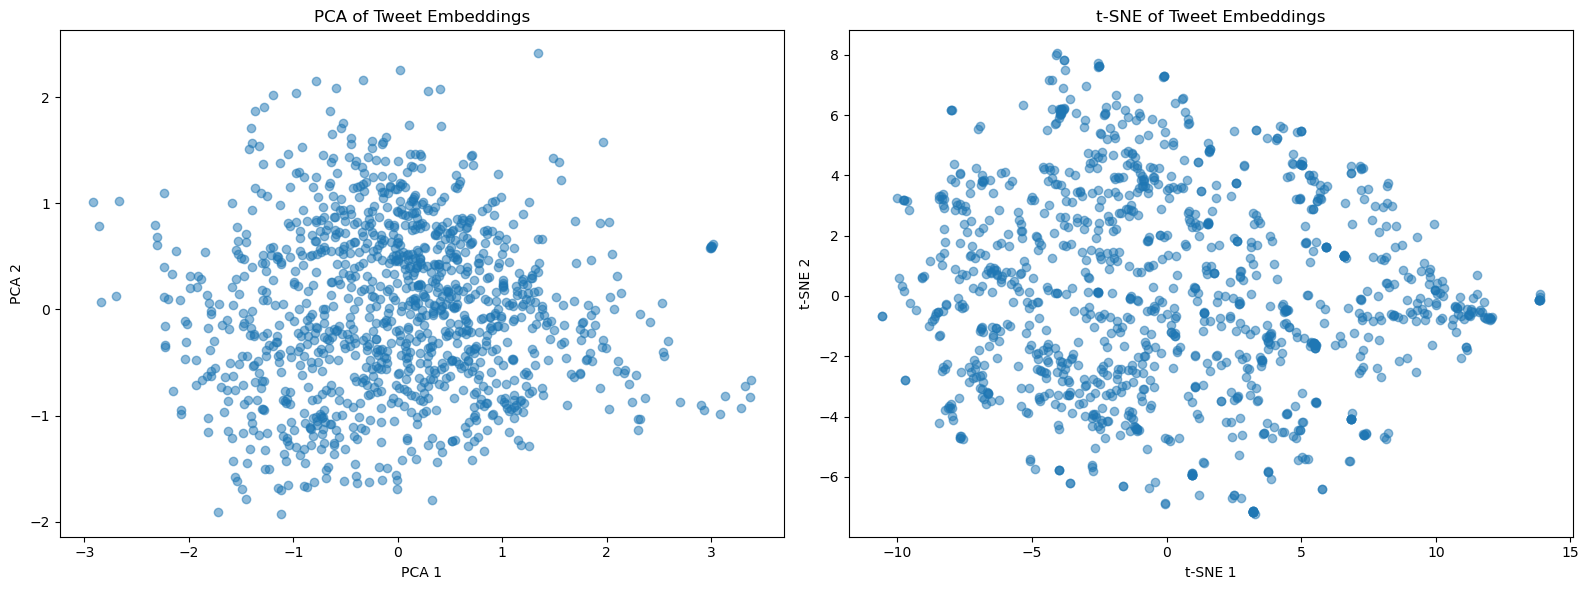

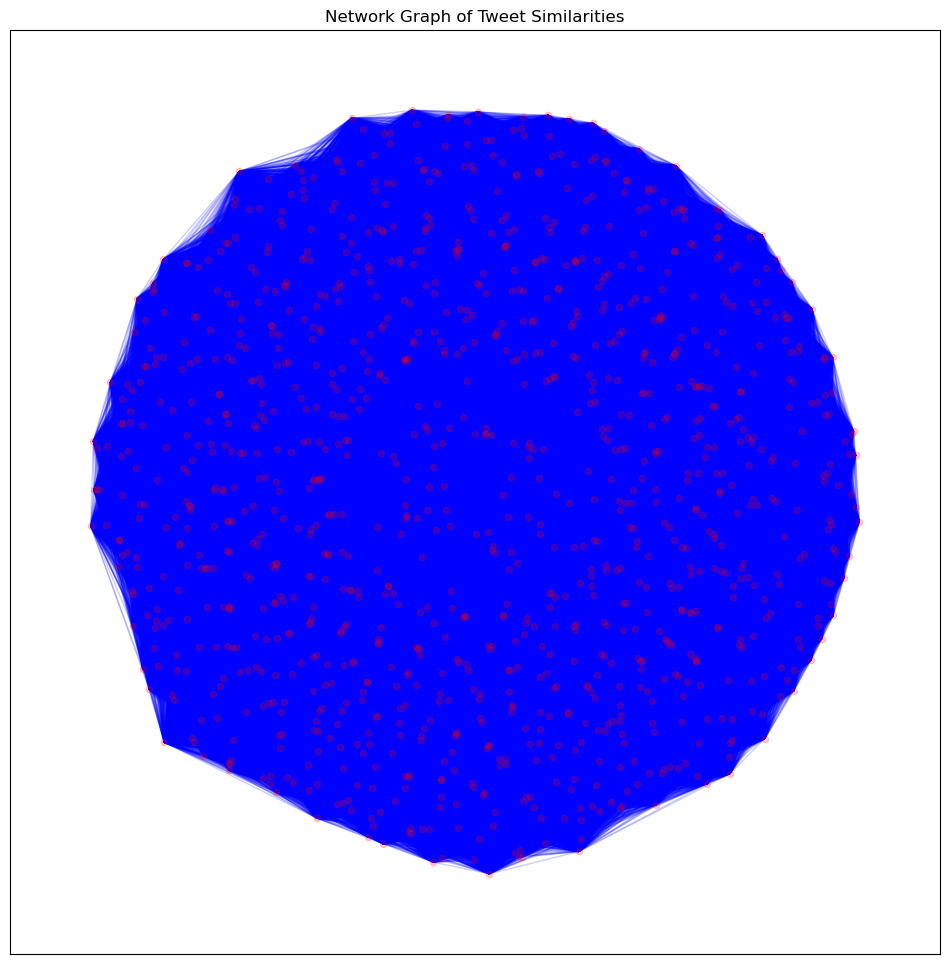

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Function to plot data types and missing values


def plot_data_overview(df):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Data types plot
    data_types = df.dtypes.value_counts()
    axs[0].bar(data_types.index.astype(str), data_types.values)
    axs[0].set_title('Data Types in Dataset')
    axs[0].set_xlabel('Data Type')
    axs[0].set_ylabel('Count')

    # Missing values plot
    missing_values = df.isnull().sum()
    axs[1].barh(missing_values.index, missing_values.values)
    axs[1].set_title('Missing Values in Dataset')
    axs[1].set_xlabel('Count')
    axs[1].set_ylabel('Column')

    plt.tight_layout()
    plt.show()

# Function to plot summary statistics


def plot_summary_statistics(df):
    summary_stats = df.describe().T
    summary_stats['std'] = summary_stats['std'].fillna(0)
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Mean and standard deviation plot
    axs[0].barh(summary_stats.index, summary_stats['mean'],
                xerr=summary_stats['std'], capsize=4)
    axs[0].set_title('Mean and Standard Deviation of Numerical Columns')
    axs[0].set_xlabel('Mean')
    axs[0].set_ylabel('Column')

    # Boxplot for numerical columns
    df.plot(kind='box', ax=axs[1])
    axs[1].set_title('Boxplot of Numerical Columns')

    plt.tight_layout()
    plt.show()

# Function to create word cloud of processed tweets


def plot_word_cloud(df):
    text = " ".join(tweet for tweet in df['processed_tweet'])
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Processed Tweets')
    plt.show()

# Function to visualize PCA and t-SNE embeddings


def plot_embeddings(embeddings):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embeddings)
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    tsne_result = tsne.fit_transform(embeddings)

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # PCA plot
    axs[0].scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    axs[0].set_title('PCA of Tweet Embeddings')
    axs[0].set_xlabel('PCA 1')
    axs[0].set_ylabel('PCA 2')

    # t-SNE plot
    axs[1].scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
    axs[1].set_title('t-SNE of Tweet Embeddings')
    axs[1].set_xlabel('t-SNE 1')
    axs[1].set_ylabel('t-SNE 2')

    plt.tight_layout()
    plt.show()

# Function to visualize network graph of tweets and similarities


def plot_network_graph(df, embeddings, threshold=0.8):
    similarities = cosine_similarity(embeddings)
    graph = nx.Graph()

    for idx, row in df.iterrows():
        graph.add_node(idx, text=row['processed_tweet'])

    for i in range(len(similarities)):
        for j in range(i+1, len(similarities)):
            if similarities[i, j] > threshold:
                graph.add_edge(i, j, weight=similarities[i, j])

    pos = nx.spring_layout(graph, k=0.15, iterations=20)
    plt.figure(figsize=(12, 12))
    nx.draw_networkx(graph, pos, with_labels=False, node_size=20,
                     edge_color='b', alpha=0.2, node_color='r')
    plt.title('Network Graph of Tweet Similarities')
    plt.show()


# Load the preprocessed dataset and embeddings
tweets_df = pd.read_csv('TweetData/combined_tweets_no_duplicates.csv')
embeddings = np.load("TweetData/roberta_tweets_embeddings_no_duplicates.npy")

# Visualize data overview
plot_data_overview(tweets_df)

# Visualize summary statistics
plot_summary_statistics(tweets_df)

# Generate word cloud of processed tweets
plot_word_cloud(tweets_df)

# Visualize PCA and t-SNE embeddings
plot_embeddings(embeddings)

# Visualize network graph of tweet similarities
plot_network_graph(tweets_df, embeddings)

In [2]:
from graphviz import Digraph

# Create a new directed graph for LegiScan API pipeline
dot1 = Digraph(comment='LegiScan API Data Collection Pipeline')

# Add nodes for each step in the LegiScan API pipeline
dot1.node('A1', 'Import Modules and Read Config')
dot1.node('B1', 'Search Laws')
dot1.node('C1', 'Save Search Results to File')
dot1.node('D1', 'Process Search Results')
dot1.node('E1', 'Fetch Bill Details')
dot1.node('F1', 'Save Detailed Bills to JSON')
dot1.node('G1', 'Extract Bill IDs from JSON')
dot1.node('H1', 'Process Files and Fetch Details')
dot1.node('I1', 'Save Detailed Bills to CSV')
dot1.node('J1', 'Load and Sort Data')
dot1.node('K1', 'Remove Duplicates')
dot1.node('L1', 'Save Updated Data to CSV')
dot1.node('M1', 'Filter Columns')
dot1.node('N1', 'Save Refined Data to CSV')
dot1.node('O1', 'Exploratory Data Analysis (EDA)')

# Add edges to define the flow of the LegiScan API pipeline
dot1.edges([('A1', 'B1'), ('B1', 'C1'), ('C1', 'D1'), ('D1', 'E1'), ('E1', 'F1'),
            ('F1', 'G1'), ('G1', 'H1'), ('H1', 'I1'), ('I1', 'J1'), ('J1', 'K1'),
            ('K1', 'L1'), ('L1', 'M1'), ('M1', 'N1'), ('N1', 'O1')])

# Add descriptions to nodes for LegiScan API pipeline
dot1.node('A1', 'Import Modules and Read Config\n\n'
                '1. Import json, os\n'
                '2. Read config.json for API key')

dot1.node('B1', 'Search Laws\n\n'
                '1. Use LegiScan API\n'
                '2. Return search results')

dot1.node('C1', 'Save Search Results to File\n\n'
                '1. Save results in JSON format\n'
                '2. Store in data directory')

dot1.node('D1', 'Process Search Results\n\n'
                '1. Extract detailed information for each bill\n'
                '2. Call fetch_bill_details function')

dot1.node('E1', 'Fetch Bill Details\n\n'
                '1. Use LegiScan API\n'
                '2. Return detailed information for bills')

dot1.node('F1', 'Save Detailed Bills to JSON\n\n'
                '1. Save detailed bills information\n'
                '2. Store in data directory')

dot1.node('G1', 'Extract Bill IDs from JSON\n\n'
                '1. Load JSON files\n'
                '2. Extract bill IDs')

dot1.node('H1', 'Process Files and Fetch Details\n\n'
                '1. Iterate through file paths\n'
                '2. Fetch detailed bill information')

dot1.node('I1', 'Save Detailed Bills to CSV\n\n'
                '1. Convert data to DataFrame\n'
                '2. Save as detailed_bills.csv')

dot1.node('J1', 'Load and Sort Data\n\n'
                '1. Load detailed_bills.csv\n'
                '2. Sort by status_date')

dot1.node('K1', 'Remove Duplicates\n\n'
                '1. Drop duplicate entries\n'
                '2. Keep the most recent')

dot1.node('L1', 'Save Updated Data to CSV\n\n'
                '1. Save as updated_detailed_bills.csv')

dot1.node('M1', 'Filter Columns\n\n'
                '1. Specify columns to keep\n'
                '2. Reindex DataFrame')

dot1.node('N1', 'Save Refined Data to CSV\n\n'
                '1. Save as refined_detailed_bills.csv')

dot1.node('O1', 'Exploratory Data Analysis (EDA)\n\n'
                '1. Load refined_detailed_bills.csv\n'
                '2. Display basic information and statistics')

# Create a new directed graph for Twitter API pipeline
dot2 = Digraph(comment='Twitter API Data Collection Pipeline')

# Add nodes for each step in the Twitter API pipeline
dot2.node('A2', 'Import Modules and Authenticate')
dot2.node('B2', 'Load and Print JSON Structure')
dot2.node('C2', 'Read and Combine JSON Files')
dot2.node('D2', 'Export to CSV')
dot2.node('E2', 'Exploratory Data Analysis (EDA)')

# Add edges to define the flow of the Twitter API pipeline
dot2.edges([('A2', 'B2'), ('B2', 'C2'), ('C2', 'D2'), ('D2', 'E2')])

# Add descriptions to nodes for Twitter API pipeline
dot2.node('A2', 'Import Modules and Authenticate\n\n'
                '1. Import tweepy, json, os\n'
                '2. Authenticate using Twitter API credentials')

dot2.node('B2', 'Load and Print JSON Structure\n\n'
                '1. Load tweets_data.json\n'
                '2. Print keys and sub-keys of JSON')

dot2.node('C2', 'Read and Combine JSON Files\n\n'
                '1. Load multiple JSON files\n'
                '2. Combine into a single list of dictionaries')

dot2.node('D2', 'Export to CSV\n\n'
                '1. Convert data to DataFrame\n'
                '2. Save as combined_tweets_data.csv')

dot2.node('E2', 'Exploratory Data Analysis (EDA)\n\n'
                '1. Load combined_tweets_data.csv\n'
                '2. Display basic information and statistics')

# Combine both graphs side by side
dot_combined = Digraph(comment='Combined Data Collection Pipelines')
dot_combined.subgraph(dot1)
dot_combined.subgraph(dot2)

# Render the combined graph to a file and display it
dot_combined.render(
    'Documentation/combined_data_collection_pipelines.gv', view=True)

'Documentation\\combined_data_collection_pipelines.gv.pdf'

In [3]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Tweet Preprocessing Pipeline')

# Add nodes for each step in the pipeline
dot.node('A', 'Data Loading and Initial Exploration')
dot.node('B', 'Text Preprocessing')
dot.node('C', 'Removing non-English Tweets, Duplicates, and Advertisements')
dot.node('D', 'Extracting Metrics and Log Normalization')
dot.node('E', 'Generate Embeddings')
dot.node('F', 'Identify and Remove Duplicates Using Embeddings')
dot.node('G', 'Sentiment Analysis')
dot.node('H', 'Dimensionality Reduction and Normalization')

# Add edges to define the flow of the pipeline
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH'])

# Add descriptions to nodes
dot.node('A', 'Data Loading and Initial Exploration\n\n'
              '1. Load the dataset\n'
              '2. Display data types\n'
              '3. Display summary statistics\n'
              '4. Identify missing values\n'
              '5. Display the first few rows of the dataframe')

dot.node('B', 'Text Preprocessing\n\n'
              '1. Lowercase conversion\n'
              '2. Remove URLs, mentions, hashtags\n'
              '3. Remove non-word characters and tokenize\n'
              '4. Remove stopwords\n'
              '5. Lemmatization')

dot.node('C', 'Removing non-English Tweets, Duplicates, and Advertisements\n\n'
              '1. Remove duplicates\n'
              '2. Remove non-English tweets\n'
              '3. Identify and remove promotional tweets')

dot.node('D', 'Extracting Metrics and Log Normalization\n\n'
              '1. Extract metrics from JSON string\n'
              '2. Sum the metrics into a new column\n'
              '3. Log normalize the total engagement')

dot.node('E', 'Generate Embeddings\n\n'
              '1. Load RoBERTa model and tokenizer\n'
              '2. Generate embeddings for processed texts\n'
              '3. Save embeddings to .npy file')

dot.node('F', 'Identify and Remove Duplicates Using Embeddings\n\n'
              '1. Compute pairwise cosine similarity\n'
              '2. Remove duplicates based on similarity threshold\n'
              '3. Save cleaned dataset and embeddings')

dot.node('G', 'Sentiment Analysis\n\n'
              '1. Load pre-trained sentiment model\n'
              '2. Perform sentiment analysis on tweets\n'
              '3. Append sentiment scores to the dataset\n'
              '4. Save updated dataset with sentiment scores')

dot.node('H', 'Dimensionality Reduction and Normalization\n\n'
              '1. Apply PCA to tweet embeddings\n'
              '2. Normalize the embeddings\n'
              '3. Save updated embeddings and dataset with PCA embeddings')

# Render the graph to a file and display it, also save as a PNG image
dot.render('Documentation/tweet_preprocessing_pipeline',
           format='png', view=True)

'Documentation\\tweet_preprocessing_pipeline.png'

In [9]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Tweet Preprocessing Pipeline')

# Add nodes for each step in the pipeline
dot.node('A', 'Data Loading and Initial Exploration')
dot.node('B', 'Text Preprocessing')
dot.node('C', 'Removing non-English Tweets, Duplicates, and Advertisements')
dot.node('D', 'Extracting Metrics and Log Normalization')
dot.node('E', 'Generate Embeddings')
dot.node('F', 'Identify and Remove Duplicates Using Embeddings')
dot.node('G', 'Sentiment Analysis')
dot.node('H', 'Dimensionality Reduction and Normalization')

# Add edges to define the flow of the pipeline
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH'])

# Add descriptions to nodes
dot.node('A', 'Data Loading and Initial Exploration\n\n'
              '1. Load the dataset\n'
              '2. Display data types\n'
              '3. Display summary statistics\n'
              '4. Identify missing values\n'
              '5. Display the first few rows of the dataframe')

dot.node('B', 'Text Preprocessing\n\n'
              '1. Lowercase conversion\n'
              '2. Remove URLs, mentions, hashtags\n'
              '3. Remove non-word characters and tokenize\n'
              '4. Remove stopwords\n'
              '5. Lemmatization')

dot.node('C', 'Removing non-English Tweets, Duplicates, and Advertisements\n\n'
              '1. Remove duplicates\n'
              '2. Remove non-English tweets\n'
              '3. Identify and remove promotional tweets')

dot.node('D', 'Extracting Metrics and Log Normalization\n\n'
              '1. Extract metrics from JSON string\n'
              '2. Sum the metrics into a new column\n'
              '3. Log normalize the total engagement')

dot.node('E', 'Generate Embeddings\n\n'
              '1. Load RoBERTa model and tokenizer\n'
              '2. Generate embeddings for processed texts\n'
              '3. Save embeddings to .npy file')

dot.node('F', 'Identify and Remove Duplicates Using Embeddings\n\n'
              '1. Compute pairwise cosine similarity\n'
              '2. Remove duplicates based on similarity threshold\n'
              '3. Save cleaned dataset and embeddings')

dot.node('G', 'Sentiment Analysis\n\n'
              '1. Load pre-trained sentiment model\n'
              '2. Perform sentiment analysis on tweets\n'
              '3. Append sentiment scores to the dataset\n'
              '4. Save updated dataset with sentiment scores')

dot.node('H', 'Dimensionality Reduction and Normalization\n\n'
              '1. Apply PCA to tweet embeddings\n'
              '2. Normalize the embeddings\n'
              '3. Save updated embeddings and dataset with PCA embeddings')

# Render the graph to a file and display it
dot.render('Documentation/tweet_preprocessing_pipeline.gv', view=True)

'tweet_preprocessing_pipeline.gv.pdf'

In [11]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Law Preprocessing Pipeline')

# Add nodes for each step in the pipeline
dot.node('A', 'Data Loading and Initial Exploration')
dot.node('B', 'Text Preprocessing')
dot.node('C', 'Removing Unnecessary Columns and Formatting Dates')
dot.node('D', 'Combining and Cleaning Text Data')
dot.node('E', 'Generate Embeddings')
dot.node('F', 'Identify and Remove Duplicates Using Embeddings')
dot.node('G', 'Dimensionality Reduction and Normalization')
dot.node('H', 'Final Data Preparation')
dot.node('I', 'Sentiment Analysis')

# Add edges to define the flow of the pipeline
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI'])

# Add descriptions to nodes
dot.node('A', 'Data Loading and Initial Exploration\n\n'
              '1. Load the dataset\n'
              '2. Display data types\n'
              '3. Display summary statistics\n'
              '4. Identify missing values\n'
              '5. Display the first few rows of the dataframe')

dot.node('B', 'Text Preprocessing\n\n'
              '1. Convert text to lowercase\n'
              '2. Remove non-word characters\n'
              '3. Tokenize and lemmatize')

dot.node('C', 'Removing Unnecessary Columns and Formatting Dates\n\n'
              '1. Drop unnecessary columns\n'
              '2. Standardize date format')

dot.node('D', 'Combining and Cleaning Text Data\n\n'
              '1. Combine title and description\n'
              '2. Clean and preprocess text')

dot.node('E', 'Generate Embeddings\n\n'
              '1. Load RoBERTa model and tokenizer\n'
              '2. Generate embeddings for processed texts\n'
              '3. Save embeddings to .npy file')

dot.node('F', 'Identify and Remove Duplicates Using Embeddings\n\n'
              '1. Compute pairwise cosine similarity\n'
              '2. Identify and remove duplicates')

dot.node('G', 'Dimensionality Reduction and Normalization\n\n'
              '1. Apply PCA\n'
              '2. Normalize embeddings')

dot.node('H', 'Final Data Preparation\n\n'
              '1. Remove unnecessary columns\n'
              '2. Format dates\n'
              '3. Add placeholders for sentiment columns\n'
              '4. Save final prepared dataset')

dot.node('I', 'Sentiment Analysis\n\n'
              '1. Load sentiment analysis model and tokenizer\n'
              '2. Perform sentiment analysis\n'
              '3. Append sentiment scores to dataset\n'
              '4. Save updated dataset and sentiment tensor')

# Render the graph to a file and display it
dot.render('Documentation/law_preprocessing_pipeline.gv', view=True)

'Documentation\\law_preprocessing_pipeline.gv.pdf'

In [4]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Law Preprocessing Pipeline')

# Add nodes for each step in the pipeline
dot.node('A', 'Data Loading and Initial Exploration')
dot.node('B', 'Text Preprocessing')
dot.node('C', 'Removing Unnecessary Columns and Formatting Dates')
dot.node('D', 'Combining and Cleaning Text Data')
dot.node('E', 'Generate Embeddings')
dot.node('F', 'Identify and Remove Duplicates Using Embeddings')
dot.node('G', 'Dimensionality Reduction and Normalization')
dot.node('H', 'Final Data Preparation')
dot.node('I', 'Sentiment Analysis')

# Add edges to define the flow of the pipeline
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI'])

# Add descriptions to nodes
dot.node('A', 'Data Loading and Initial Exploration\n\n'
              '1. Load the dataset\n'
              '2. Display data types\n'
              '3. Display summary statistics\n'
              '4. Identify missing values\n'
              '5. Display the first few rows of the dataframe')

dot.node('B', 'Text Preprocessing\n\n'
              '1. Convert text to lowercase\n'
              '2. Remove non-word characters\n'
              '3. Tokenize and lemmatize')

dot.node('C', 'Removing Unnecessary Columns and Formatting Dates\n\n'
              '1. Drop unnecessary columns\n'
              '2. Standardize date format')

dot.node('D', 'Combining and Cleaning Text Data\n\n'
              '1. Combine title and description\n'
              '2. Clean and preprocess text')

dot.node('E', 'Generate Embeddings\n\n'
              '1. Load RoBERTa model and tokenizer\n'
              '2. Generate embeddings for processed texts\n'
              '3. Save embeddings to .npy file')

dot.node('F', 'Identify and Remove Duplicates Using Embeddings\n\n'
              '1. Compute pairwise cosine similarity\n'
              '2. Identify and remove duplicates')

dot.node('G', 'Dimensionality Reduction and Normalization\n\n'
              '1. Apply PCA\n'
              '2. Normalize embeddings')

dot.node('H', 'Final Data Preparation\n\n'
              '1. Remove unnecessary columns\n'
              '2. Format dates\n'
              '3. Add placeholders for sentiment columns\n'
              '4. Save final prepared dataset')

dot.node('I', 'Sentiment Analysis\n\n'
              '1. Load sentiment analysis model and tokenizer\n'
              '2. Perform sentiment analysis\n'
              '3. Append sentiment scores to dataset\n'
              '4. Save updated dataset and sentiment tensor')

# Render the graph to a file and display it, also save as a PNG image
dot.render('Documentation/law_preprocessing_pipeline', format='png', view=True)

'Documentation\\law_preprocessing_pipeline.png'

In [13]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='PCA Graph Pipeline')

# Add nodes for each step in the pipeline
dot.node('A', 'Data Loading and Initial Exploration')
dot.node('B', 'PCA Transformation')
dot.node('C', 'Constructing the Heterogeneous Graph')
dot.node('D', 'Adding Tweet-Tweet Edges Based on Cosine Similarity')
dot.node('E', 'Adding Tweet-Bill Edges Based on Cosine Similarity')
dot.node('F', 'Calculating Node Degree Statistics')
dot.node('G', 'Adding Edge Weights')
dot.node('H', 'Aggregating Sentiments')
dot.node('I', 'Updating Sentiments for Failed Bills')
dot.node('J', 'Splitting Data into Training, Validation, and Test Sets')
dot.node('K', 'Building and Training the GNN Model')
dot.node('L', 'Evaluating the Model')
dot.node('M', 'Hyperparameter Tuning and Experimentation')
dot.node('N', 'Visualizing Results')
dot.node('O', 'Final Model Selection and Evaluation')

# Add edges to define the flow of the pipeline
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'IJ', 'JK', 'KL', 'LM', 'MN', 'NO'])

# Add descriptions to nodes
dot.node('A', 'Data Loading and Initial Exploration\n\n'
              '1. Load tweet and bill data\n'
              '2. Verify data shapes')

dot.node('B', 'PCA Transformation\n\n'
              '1. Apply PCA to tweet embeddings\n'
              '2. Match dimensions with bill embeddings')

dot.node('C', 'Constructing the Heterogeneous Graph\n\n'
              '1. Initialize HeteroData object\n'
              '2. Add nodes and edges')

dot.node('D', 'Adding Tweet-Tweet Edges Based on Cosine Similarity\n\n'
              '1. Calculate cosine similarity\n'
              '2. Create edges above threshold')

dot.node('E', 'Adding Tweet-Bill Edges Based on Cosine Similarity\n\n'
              '1. Calculate cosine similarity\n'
              '2. Create top similar connections')

dot.node('F', 'Calculating Node Degree Statistics\n\n'
              '1. Compute node degrees\n'
              '2. Identify nodes with no connections')

dot.node('G', 'Adding Edge Weights\n\n'
              '1. Calculate weights based on engagement and time\n'
              '2. Assign weights to edges')

dot.node('H', 'Aggregating Sentiments\n\n'
              '1. Aggregate weighted sentiments\n'
              '2. Save aggregated sentiments')

dot.node('I', 'Updating Sentiments for Failed Bills\n\n'
              '1. Adjust sentiment values for failed bills\n'
              '2. Save updated sentiments')

dot.node('J', 'Splitting Data into Training, Validation, and Test Sets\n\n'
              '1. Create stratified masks\n'
              '2. Add masks to data object')

dot.node('K', 'Building and Training the GNN Model\n\n'
              '1. Define GNN model\n'
              '2. Train model with early stopping')

dot.node('L', 'Evaluating the Model\n\n'
              '1. Calculate evaluation metrics\n'
              '2. Print evaluation results')

dot.node('M', 'Hyperparameter Tuning and Experimentation\n\n'
              '1. Define architectures and configurations\n'
              '2. Run experiments')

dot.node('N', 'Visualizing Results\n\n'
              '1. Compare key metrics\n'
              '2. Plot loss history')

dot.node('O', 'Final Model Selection and Evaluation\n\n'
              '1. Select and evaluate best model\n'
              '2. Plot loss history')

# Render the graph to a file and display it
dot.render('Documentation/pca_graph_pipeline.gv', view=True)

'Documentation\\pca_graph_pipeline.gv.pdf'

In [1]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Project Pipeline Visualization')

# Define nodes and edges for the Twitter API Pipeline
dot.node('TA', 'Twitter: Import Modules and Authenticate')
dot.node('TB', 'Twitter: Load and Print JSON Structure')
dot.node('TC', 'Twitter: Read and Combine JSON Files')
dot.node('TD', 'Twitter: Export to CSV')
dot.node('TE', 'Twitter: EDA')
dot.edges([('TA', 'TB'), ('TB', 'TC'), ('TC', 'TD'), ('TD', 'TE')])

# Define nodes and edges for the LegiScan API Pipeline
dot.node('LA', 'LegiScan: Import Modules and Read Config')
dot.node('LB', 'LegiScan: Search Laws')
dot.node('LC', 'LegiScan: Save Search Results')
dot.node('LD', 'LegiScan: Fetch Bill Details')
dot.node('LE', 'LegiScan: Save Detailed Bills to JSON')
dot.node('LF', 'LegiScan: Process and Save to CSV')
dot.node('LG', 'LegiScan: EDA')
dot.edges([('LA', 'LB'), ('LB', 'LC'), ('LC', 'LD'),
          ('LD', 'LE'), ('LE', 'LF'), ('LF', 'LG')])

# Define nodes for the combined graph processing
dot.node('G1', 'Graph: Construct Heterogeneous Graph')
dot.node('G2', 'Graph: PCA and Embeddings')
dot.node('G3', 'Graph: Sentiment Aggregation')
dot.node('G4', 'Graph: GNN Model Training and Evaluation')
dot.edges([('TE', 'G1'), ('LG', 'G1'), ('G1', 'G2'), ('G2', 'G3'), ('G3', 'G4')])

# Add descriptions to key nodes for clarity
dot.node('TE', 'Twitter EDA\nExtract and analyze Twitter data')
dot.node('LG', 'LegiScan EDA\nAnalyze detailed bill data')
dot.node('G1', 'Construct Graph\nCombine Twitter and LegiScan data into a graph')
dot.node('G4', 'Model Evaluation\nEvaluate GNN model performance')

# Render the graph to a file and display it
dot.render('Documentation/project_pipeline_visualization',
           format='png', view=True)

'Documentation\\project_pipeline_visualization.png'

In [6]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Project Pipeline Visualization')
# Smaller size and font for tight column fit
dot.attr(rankdir='TB', size='6,8', fontsize='10')

# Styling definitions for nodes and edges
node_style = {'shape': 'box', 'style': 'filled',
              'color': 'lightblue', 'fontname': 'Helvetica', 'fontsize': '10'}
edge_style = {'style': 'bold', 'color': 'blue', 'fontsize': '10'}
cluster_style = {'style': 'filled', 'color': 'lightgrey',
                 'labeljust': 'c', 'fontname': 'Helvetica Bold', 'fontsize': '11'}

# Define subgraphs for Twitter API Pipeline including preprocessing steps
with dot.subgraph(name='cluster_twitter') as c:
    c.attr(**cluster_style, label='Twitter API')
    c.attr('node', **node_style)
    c.attr('edge', **edge_style)
    c.node('TA', 'Auth & Import')
    c.node('TB', 'Load JSON')
    c.node('TC', 'Combine JSON')
    c.node('TD', 'Export CSV')
    c.node('TE', 'EDA')
    c.edges([('TA', 'TB'), ('TB', 'TC'), ('TC', 'TD'), ('TD', 'TE')])
    # Add preprocessing steps
    c.node('TF', 'Load Data')
    c.node('TG', 'Text Preproc.')
    c.node('TH', 'Remove Non-Eng & Ads')
    c.node('TI', 'Metrics & Log Norm')
    c.node('TJ', 'Generate Embeds')
    c.node('TK', 'Remove Dups')
    c.node('TL', 'Sentiment Analysis')
    c.node('TM', 'Dim Reduction')
    c.edges([('TE', 'TF'), ('TF', 'TG'), ('TG', 'TH'), ('TH', 'TI'),
            ('TI', 'TJ'), ('TJ', 'TK'), ('TK', 'TL'), ('TL', 'TM')])

# Define subgraphs for LegiScan API Pipeline including preprocessing steps
with dot.subgraph(name='cluster_legiscan') as c:
    c.attr(**cluster_style, label='LegiScan API')
    c.attr('node', **node_style)
    c.attr('edge', **edge_style)
    c.node('LA', 'Auth & Import')
    c.node('LB', 'Search Laws')
    c.node('LC', 'Save Results')
    c.node('LD', 'Fetch Details')
    c.node('LE', 'Save JSON')
    c.node('LF', 'Process CSV')
    c.node('LG', 'EDA')
    c.edges([('LA', 'LB'), ('LB', 'LC'), ('LC', 'LD'),
            ('LD', 'LE'), ('LE', 'LF'), ('LF', 'LG')])
    # Add preprocessing steps
    c.node('LH', 'Load Data')
    c.node('LI', 'Text Preproc.')
    c.node('LJ', 'Format & Clean')
    c.node('LK', 'Combine Text')
    c.node('LL', 'Generate Embeds')
    c.node('LM', 'Remove Dups')
    c.node('LN', 'Dim Reduction')
    c.node('LO', 'Prepare Data')
    c.node('LP', 'Sentiment Analysis')
    c.edges([('LG', 'LH'), ('LH', 'LI'), ('LI', 'LJ'), ('LJ', 'LK'),
            ('LK', 'LL'), ('LL', 'LM'), ('LM', 'LN'), ('LN', 'LO'), ('LO', 'LP')])

# Define nodes for the combined graph processing and apply global edge styles
dot.attr('node', **node_style)
dot.attr('edge', **edge_style)
dot.node('G1', 'Construct Graph')
dot.node('G2', 'PCA & Embeds')
dot.node('G3', 'Aggregate Sentiments')
dot.node('G4', 'Train GNN')
dot.edges([('TM', 'G1'), ('LP', 'G1'), ('G1', 'G2'), ('G2', 'G3'), ('G3', 'G4')])

# Render the graph to a file and display it
dot.render('Documentation/project_pipeline_visualization_complete', view=True)


(process:171372): Pango-WARNING **: 11:34:40.051: couldn't load font "Helvetica Bold Not-Rotated 11", falling back to "Sans Bold Not-Rotated 11", expect ugly output.


'Documentation\\project_pipeline_visualization_complete.pdf'

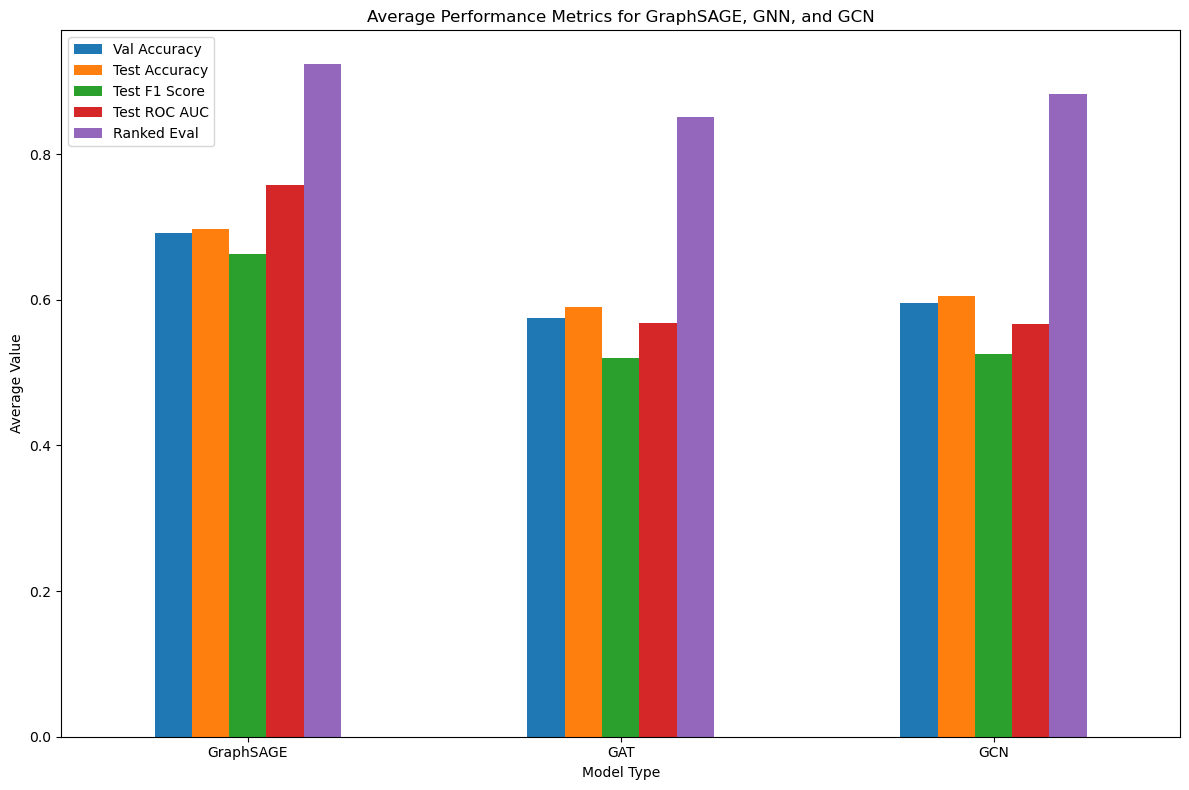

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Models/all_results.xlsx'
df = pd.read_excel(file_path)

# Extract the model types from the 'I' column
df['Model'] = df['Experiment'].apply(lambda x: x.split('_')[0])

# Define the metrics we are interested in
metrics = ['Val Accuracy', 'Test Accuracy', 'Test F1 Score',
           'Test ROC AUC', 'Ranked Eval']

# Initialize a dictionary to store the averages
average_metrics = {metric: [] for metric in metrics}
model_types = ['GraphSAGE', 'GAT', 'GCN']

# Calculate the average metrics for each model type
for model in model_types:
    model_df = df[df['Model'] == model]
    for metric in metrics:
        average_metrics[metric].append(model_df[metric].mean())

# Create a DataFrame for the averaged metrics
average_metrics_df = pd.DataFrame(average_metrics, index=model_types)

# Plot the results
average_metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Performance Metrics for GraphSAGE, GNN, and GCN')
plt.ylabel('Average Value')
plt.xlabel('Model Type')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()